#**Actividad 6 (Regresión No Lineal)**
##**Eduardo Ernesto Bolaños Castro A00830782**
##**Brenda Hernandez Velasquez A01701703**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

## Agregar el archivo: “Cuentas_credicel.csv”

In [ ]:
df = pd.read_csv('cuentas_credicel.csv', encoding='latin')
df.head()

<ipython-input-828-51a45a5db4e7>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cuentas_credicel.csv', encoding='latin')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

## Realiza las acciones de preprocesamiento necesarias: Nulos y Outliers

In [ ]:
df.isnull().sum()

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                 13
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
puntos                   0
riesgo                   0
score_buro               0
razones_buro          7340
porc_eng                 0
limite_credito           0
semana_actual            0
cp_cliente            7243
edad_cliente             9
cd_cliente               0
edo_cliente              8
cd_venta                 0
e

In [ ]:
df['empresa'] = df['empresa'].fillna(method = 'ffill')
df['fecha_ultimo_pago'] = df['fecha_ultimo_pago'].fillna('01/01/1900 00:00')
df['fecha_pago_proximo'] = df['fecha_pago_proximo'].fillna('01/01/1900 00:00')
df['status_cuenta'] = df['status_cuenta'].fillna('Corriente')
df['razones_buro'] = df['razones_buro'].fillna(method = 'bfill')
df['edo_cliente'] = df['edo_cliente'].fillna(method = 'bfill')
df['cp_cliente'] = df['cp_cliente'].fillna(method = 'bfill')
df['edad_cliente'] = df['edad_cliente'].fillna(round(df['edad_cliente'].mean(),0))
df['limite_credito'] = df['limite_credito'].fillna(7000)

In [ ]:
df['limite_credito'] = df['limite_credito'].replace('SD', 0)
df['limite_credito'] = df['limite_credito'].astype(float)

In [ ]:
columnasobj = df.select_dtypes(include = ['object']).columns
df = df.drop(columnasobj, axis = 1)
df = df.drop('fraude', axis = 1)
df = df.drop('reautorizacion', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   precio            22735 non-null  float64
 3   enganche          22735 non-null  float64
 4   descuento         22735 non-null  float64
 5   semana            22735 non-null  int64  
 6   monto_financiado  22735 non-null  float64
 7   costo_total       22735 non-null  int64  
 8   monto_accesorios  22735 non-null  float64
 9   status            22735 non-null  int64  
 10  inversion         22735 non-null  int64  
 11  pagos_realizados  22735 non-null  int64  
 12  puntos            22735 non-null  int64  
 13  riesgo            22735 non-null  float64
 14  score_buro        22735 non-null  int64  
 15  porc_eng          22735 non-null  float64
 16  limite_credito    22735 non-null  float6

In [ ]:
df.isnull().sum().sum()

0

<Figure size 3000x5000 with 0 Axes>

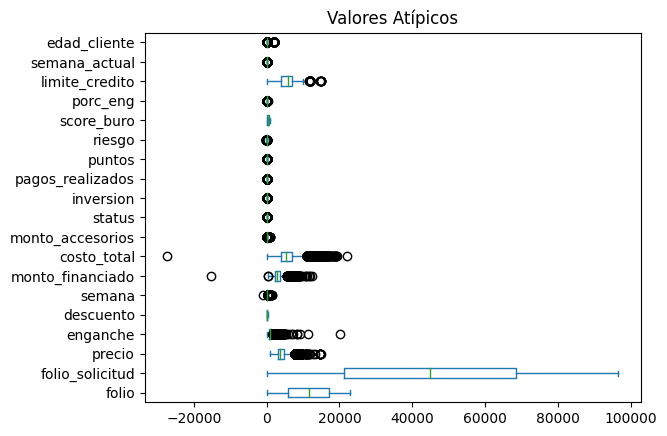

In [ ]:
#Realizamos diagrama de caja del df
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(30, 50))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos")
plt.show()

In [ ]:
y=df
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite Superior: ", Limite_Superior)
print("Limite Inferior: ", Limite_Inferior)

Limite Superior:  folio                31323.107698
folio_solicitud     127723.906961
precio                8081.558082
enganche              2356.496845
descuento              478.215020
semana                 541.287392
monto_financiado      6366.317810
costo_total          12857.588246
monto_accesorios       191.260880
status                   2.611178
inversion                1.511599
pagos_realizados        39.306132
puntos                  48.354233
riesgo                  58.456322
score_buro            1142.021000
porc_eng                45.711306
limite_credito       12331.577603
semana_actual           64.380898
edad_cliente           422.315363
dtype: float64
Limite Inferior:  folio               -8301.055796
folio_solicitud    -36023.715538
precio                -87.484900
enganche             -503.622066
descuento            -321.263535
semana                -65.792692
monto_financiado     -214.044583
costo_total         -1458.203597
monto_accesorios     -164.333344
status

In [ ]:
df= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df.head()

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,inversion,pagos_realizados,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
0,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0,0.0,0.0,0.0,0,40.02,5000.0,26.0,23.0
1,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0,0.0,0.0,0.0,0,35.01,6000.0,13.0,60.0
2,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,NaN,0,0.0,0.0,0.0,0,25.01,0.0,NaN,58.0
3,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0,0.0,0.0,0.0,0,25.01,7000.0,13.0,42.0
4,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0,0.0,0.0,0.0,0,25.01,7000.0,NaN,33.0


In [ ]:
df.isnull().sum()

folio                 0
folio_solicitud       0
precio              110
enganche            292
descuento            17
semana              362
monto_financiado    182
costo_total         290
monto_accesorios    617
status              154
inversion             0
pagos_realizados    184
puntos                3
riesgo               65
score_buro            0
porc_eng            275
limite_credito        7
semana_actual       178
edad_cliente         99
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   precio            22625 non-null  float64
 3   enganche          22443 non-null  float64
 4   descuento         22718 non-null  float64
 5   semana            22373 non-null  float64
 6   monto_financiado  22553 non-null  float64
 7   costo_total       22445 non-null  float64
 8   monto_accesorios  22118 non-null  float64
 9   status            22581 non-null  float64
 10  inversion         22735 non-null  int64  
 11  pagos_realizados  22551 non-null  float64
 12  puntos            22732 non-null  float64
 13  riesgo            22670 non-null  float64
 14  score_buro        22735 non-null  int64  
 15  porc_eng          22460 non-null  float64
 16  limite_credito    22728 non-null  float6

In [ ]:
df = df.fillna(df.mean())
df.head()

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,inversion,pagos_realizados,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
0,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.000000,0,0.0,0.0,0.0,0,40.02,5000.0,26.000000,23.0
1,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.000000,0,0.0,0.0,0.0,0,35.01,6000.0,13.000000,60.0
2,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.243346,0,0.0,0.0,0.0,0,25.01,0.0,20.238285,58.0
3,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.000000,0,0.0,0.0,0.0,0,25.01,7000.0,13.000000,42.0
4,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.000000,0,0.0,0.0,0.0,0,25.01,7000.0,20.238285,33.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   precio            22735 non-null  float64
 3   enganche          22735 non-null  float64
 4   descuento         22735 non-null  float64
 5   semana            22735 non-null  float64
 6   monto_financiado  22735 non-null  float64
 7   costo_total       22735 non-null  float64
 8   monto_accesorios  22735 non-null  float64
 9   status            22735 non-null  float64
 10  inversion         22735 non-null  int64  
 11  pagos_realizados  22735 non-null  float64
 12  puntos            22735 non-null  float64
 13  riesgo            22735 non-null  float64
 14  score_buro        22735 non-null  int64  
 15  porc_eng          22735 non-null  float64
 16  limite_credito    22735 non-null  float6

In [ ]:
df.isnull().sum()

folio               0
folio_solicitud     0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
inversion           0
pagos_realizados    0
puntos              0
riesgo              0
score_buro          0
porc_eng            0
limite_credito      0
semana_actual       0
edad_cliente        0
dtype: int64

In [ ]:
df.describe()

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,inversion,pagos_realizados,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
count,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000,22735.000000
mean,11511.025951,45850.095711,3969.204809,897.571160,78.160313,231.393018,3043.789420,5588.620361,5.009992,1.243346,0.236596,9.917033,14.152076,5.244532,289.953552,22.809250,5917.020855,20.238285,35.345070
std,6604.027249,27291.270417,1295.204963,370.539236,132.746538,86.084072,1020.864637,2152.608806,23.849845,0.427656,0.425001,9.252767,11.391702,17.398553,284.022483,6.083129,2131.423509,13.969484,11.904959
min,3.000000,30.000000,973.240000,0.000000,0.000000,7.000000,249.000000,91.000000,0.000000,1.000000,0.000000,0.000000,-15.000000,-47.000000,0.000000,2.750000,0.000000,0.000000,14.000000
25%,5818.500000,21214.500000,3049.000000,625.500000,0.000000,170.000000,2363.000000,4056.000000,0.000000,1.000000,0.000000,2.000000,10.000000,-5.500000,0.000000,18.450000,4000.000000,11.000000,26.000000
50%,11520.000000,44938.000000,3549.000000,826.000000,0.000000,214.000000,2824.000000,5213.000000,0.000000,1.000000,0.000000,8.000000,12.000000,2.400000,427.000000,22.809250,6000.000000,16.000000,34.000000
75%,17224.500000,68485.500000,4849.000000,1091.000000,200.000000,279.000000,3658.880000,6747.000000,0.000000,1.000000,0.000000,15.000000,14.000000,20.550000,548.000000,25.570000,7000.000000,26.000000,43.000000
max,22971.000000,96536.000000,8069.000000,2349.000000,400.000000,541.000000,6366.010000,12844.000000,190.000000,2.000000,1.000000,39.000000,48.000000,58.000000,814.000000,45.700000,12000.000000,64.000000,87.000000


In [ ]:
matriz = df.corr()
matriz

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,inversion,pagos_realizados,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
folio,1.000000,0.971332,0.089539,0.125603,0.134939,0.097617,0.070554,0.048342,0.105585,-0.402012,-0.139744,-0.462128,-0.120518,0.360561,0.548206,0.085404,-0.389241,-0.809654,-0.012748
folio_solicitud,0.971332,1.000000,0.090329,0.122568,0.131476,0.099369,0.072683,0.049955,0.094280,-0.391827,-0.130940,-0.453279,-0.136636,0.348442,0.527624,0.079579,-0.373411,-0.787989,-0.013633
precio,0.089539,0.090329,1.000000,0.690541,0.018582,0.611026,0.935647,0.838116,-0.024337,-0.097702,-0.009418,0.021135,0.072409,-0.042130,0.077478,-0.037844,0.071461,-0.007987,-0.078693
enganche,0.125603,0.122568,0.690541,1.000000,-0.025831,0.379105,0.515344,0.448240,-0.015716,-0.074158,-0.106344,-0.088178,-0.211251,0.300961,0.069649,0.550999,-0.363671,-0.085123,-0.106750
descuento,0.134939,0.131476,0.018582,-0.025831,1.000000,-0.019941,0.033969,0.050457,0.025153,-0.068912,0.243043,0.043343,-0.084648,0.044846,0.106816,-0.058825,-0.099431,-0.123154,-0.019185
semana,0.097617,0.099369,0.611026,0.379105,-0.019941,1.000000,0.602359,0.351681,-0.014541,0.140348,0.016370,-0.116878,0.084548,-0.071683,0.060465,-0.115539,0.097150,-0.174358,-0.027625
monto_financiado,0.070554,0.072683,0.935647,0.515344,0.033969,0.602359,1.000000,0.880544,-0.014843,-0.104274,0.031904,0.054579,0.164210,-0.173171,0.073016,-0.253559,0.215092,0.020519,-0.058123
costo_total,0.048342,0.049955,0.838116,0.448240,0.050457,0.351681,0.880544,1.000000,0.006634,-0.191917,0.026717,0.120754,0.154028,-0.170578,0.077757,-0.256817,0.216293,0.098411,-0.055275
monto_accesorios,0.105585,0.094280,-0.024337,-0.015716,0.025153,-0.014541,-0.014843,0.006634,1.000000,-0.041117,-0.022557,-0.055981,-0.028961,0.059312,0.061046,0.000026,-0.054171,-0.085515,0.003156
status,-0.402012,-0.391827,-0.097702,-0.074158,-0.068912,0.140348,-0.104274,-0.191917,-0.041117,1.000000,0.090981,0.296093,0.072810,-0.162938,-0.230339,-0.012592,0.155638,-0.003033,0.067533


In [ ]:
matriz.n = np.abs(matriz)
matriz.n

<ipython-input-845-eedb82ff93a6>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  matriz.n = np.abs(matriz)


,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,inversion,pagos_realizados,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
folio,1.000000,0.971332,0.089539,0.125603,0.134939,0.097617,0.070554,0.048342,0.105585,0.402012,0.139744,0.462128,0.120518,0.360561,0.548206,0.085404,0.389241,0.809654,0.012748
folio_solicitud,0.971332,1.000000,0.090329,0.122568,0.131476,0.099369,0.072683,0.049955,0.094280,0.391827,0.130940,0.453279,0.136636,0.348442,0.527624,0.079579,0.373411,0.787989,0.013633
precio,0.089539,0.090329,1.000000,0.690541,0.018582,0.611026,0.935647,0.838116,0.024337,0.097702,0.009418,0.021135,0.072409,0.042130,0.077478,0.037844,0.071461,0.007987,0.078693
enganche,0.125603,0.122568,0.690541,1.000000,0.025831,0.379105,0.515344,0.448240,0.015716,0.074158,0.106344,0.088178,0.211251,0.300961,0.069649,0.550999,0.363671,0.085123,0.106750
descuento,0.134939,0.131476,0.018582,0.025831,1.000000,0.019941,0.033969,0.050457,0.025153,0.068912,0.243043,0.043343,0.084648,0.044846,0.106816,0.058825,0.099431,0.123154,0.019185
semana,0.097617,0.099369,0.611026,0.379105,0.019941,1.000000,0.602359,0.351681,0.014541,0.140348,0.016370,0.116878,0.084548,0.071683,0.060465,0.115539,0.097150,0.174358,0.027625
monto_financiado,0.070554,0.072683,0.935647,0.515344,0.033969,0.602359,1.000000,0.880544,0.014843,0.104274,0.031904,0.054579,0.164210,0.173171,0.073016,0.253559,0.215092,0.020519,0.058123
costo_total,0.048342,0.049955,0.838116,0.448240,0.050457,0.351681,0.880544,1.000000,0.006634,0.191917,0.026717,0.120754,0.154028,0.170578,0.077757,0.256817,0.216293,0.098411,0.055275
monto_accesorios,0.105585,0.094280,0.024337,0.015716,0.025153,0.014541,0.014843,0.006634,1.000000,0.041117,0.022557,0.055981,0.028961,0.059312,0.061046,0.000026,0.054171,0.085515,0.003156
status,0.402012,0.391827,0.097702,0.074158,0.068912,0.140348,0.104274,0.191917,0.041117,1.000000,0.090981,0.296093,0.072810,0.162938,0.230339,0.012592,0.155638,0.003033,0.067533


## Elegir 5 modelos de correlación No lineal y Analizar la correlación que existe entre las siguientes variables: Riesgo (variable objetivo), score_buro (variable objetivo), porc_eng (variable objetivo), y limite_crédito (variable objetivo), aplicando la herramienta de “Regresión No Lineal”

In [ ]:
#Grafico de dispersión de todas las variables
#sns.pairplot(df)

In [ ]:
coeficientes = np.zeros((20, 4))

## Variable Riesgo

### Modelo 1 (Función cuadrática)

In [ ]:
Vars_Indep= df[['score_buro']]
Var_Dep= df['riesgo']
x= Vars_Indep
y= Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
parametros, covs= curve_fit(func1, df['score_buro'], df['riesgo'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-3.45696361e-04,  2.02015342e-01,  3.61889160e+00])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['score_buro'], df['riesgo'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

,score_buro
0,3.618892
1,3.618892
2,3.618892
3,3.618892
4,3.618892
...,...
22730,22.324370
22731,17.913728
22732,23.512279
22733,-24.079972


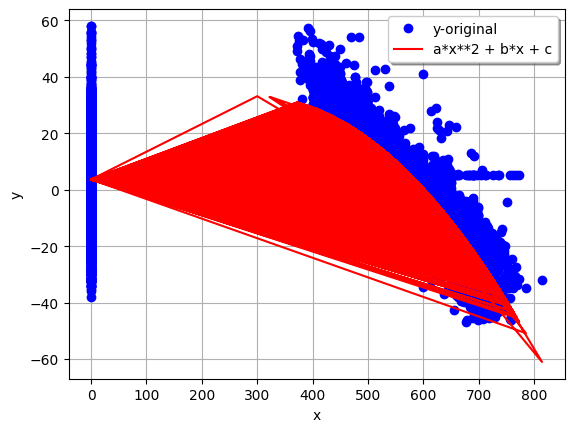

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b*x + c", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2 = r2_score(y, yfit1)
R2

0.47022245268165797

In [ ]:
corr= np.sqrt(abs(R2))
corr

0.685727681140012

### Modelo 2 (Función logaritmica)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df[['porc_eng']]
Var_Dep= df['riesgo']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
def  func1 (x, a, b):
     return a*np.log(x) + b

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['porc_eng'], df['riesgo'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 33.36023814, -97.86554145])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['porc_eng'], df['riesgo'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.log(x) + b

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

,porc_eng
0,25.213032
1,20.751247
2,9.530264
3,9.530264
4,9.530264
...,...
22730,-25.050990
22731,15.027213
22732,7.819810
22733,13.958215


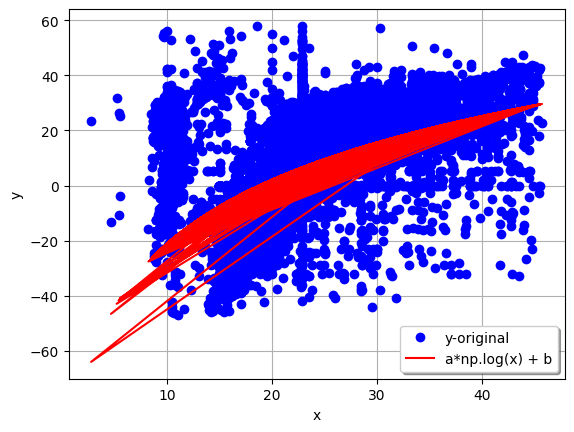

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.log(x) + b", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

0.2771013950971043

In [ ]:
#Calculamos el coeficiente de correlación del modelo
corr= np.sqrt(abs(R2))
corr

0.5264042126513657

### Modelo 3 (Función cociente entre polinomios)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df[['puntos']]
Var_Dep= df['riesgo']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['puntos'], df['riesgo'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-1.76650698e-03,  2.03416890e+00,  2.78899841e+00])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['puntos'], df['riesgo'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =(a*x**2 + b)/ c*x

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

,puntos
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
22730,6.660162
22731,6.102455
22732,7.179867
22733,8.472959


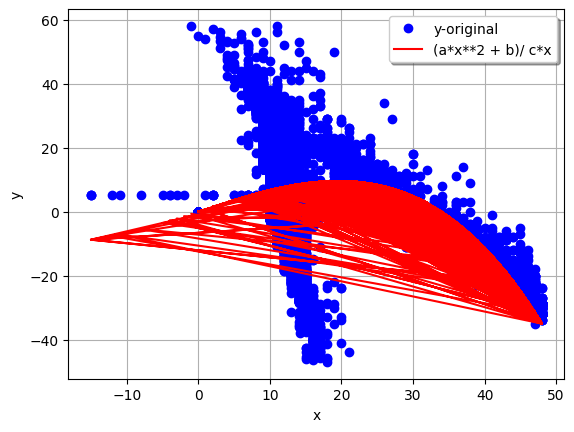

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="(a*x**2 + b)/ c*x", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2


0.23251793821569455

In [ ]:
#Calculamos el coeficiente de correlación del modelo
corr= np.sqrt(abs(R2))
corr

0.4822011387540417

### Modelo 4 (Función Valor absoluto)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df[['semana_actual']]
Var_Dep= df['riesgo']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
def  func1 (x, a):
     return a*np.abs(x) + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['semana_actual'], df['riesgo'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-2.07911453])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['semana_actual'], df['riesgo'])
a = parametros[ 0 ]
yfit1 = a*np.abs(x) + b*x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

,semana_actual
0,1.620412
1,2.204705
2,1.879376
3,2.204705
4,1.879376
...,...
22730,2.788998
22731,2.788998
22732,2.788998
22733,2.788998


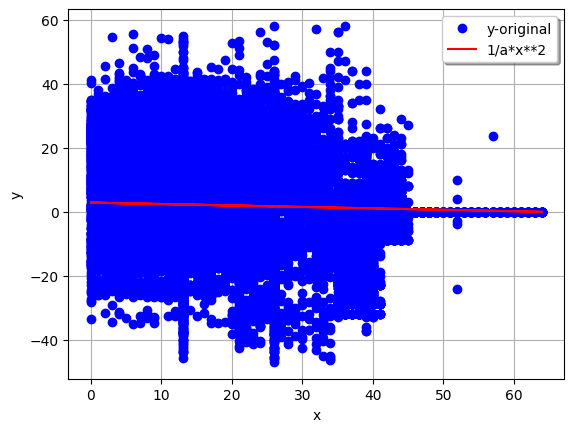

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="1/a*x**2", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2


-0.015884019917616232

In [ ]:
#Calculamos el coeficiente de correlación del modelo
corr= np.sqrt(abs(R2))
corr

0.12603182105173372

### Modelo 5 (Función cuadrática)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df[['enganche']]
Var_Dep= df['riesgo']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
def  func1 (x, a, b):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['enganche'], df['riesgo'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 5.28474259e-06, -2.03302687e-03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['enganche'], df['riesgo'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = a*x**2 + b*x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

,enganche
0,4.418475
1,6.480749
2,3.061682
3,3.061682
4,6.710675
...,...
22730,2.651351
22731,8.055677
22732,7.460354
22733,5.221780


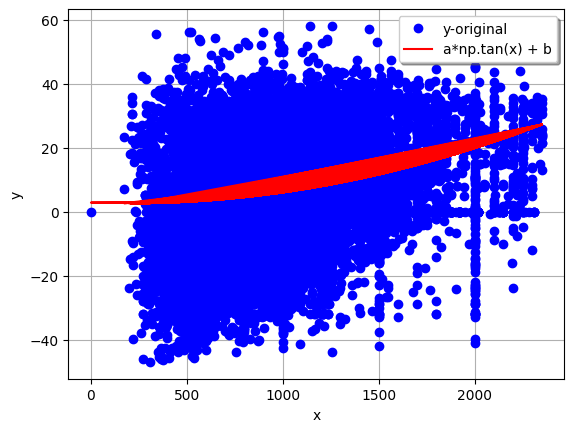

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.tan(x) + b", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

0.05799663239568176

In [ ]:
#Calculamos el coeficiente de correlación del modelo
corr= np.sqrt(abs(R2))
corr

0.24082489986644187

## Variable score_buro

### Modelo 1 (Función inversa)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df[['puntos']]
Var_Dep= df['score_buro']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return 1/a*x

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['puntos'], df['score_buro'])

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([0.097677, 1.      , 1.      ])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['puntos'], df['score_buro'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = 1/a*x

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

,puntos
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
22730,102.378251
22731,92.140426
22732,112.616076
22733,143.329551


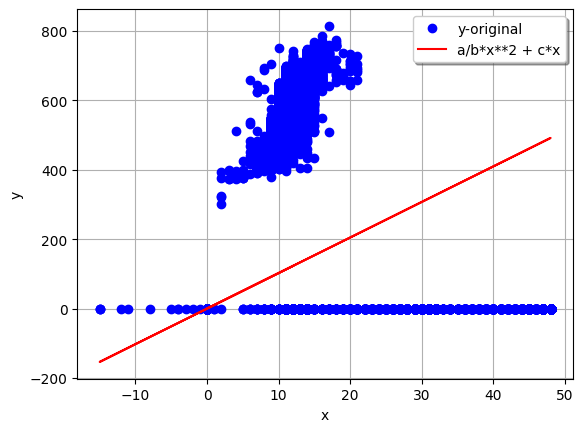

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a/b*x**2 + c*x", c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

-0.6133979740866786

In [ ]:
#Calculamos el coeficiente de correlación del modelo
corr= np.sqrt(abs(R2))
corr

0.7831972766083132

### Modelo 2 (Función cuadrática inversa)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df[['edad_cliente']]
Var_Dep= df['score_buro']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
def  func1 (x, a, b):
     return 1/a*x**2

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['edad_cliente'], df['score_buro'])

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([6.61567074, 1.        ])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['edad_cliente'], df['score_buro'])
a, b = parametros[ 0 ], parametros[ 1 ]
yfit1 = 1/a*x**2

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

,edad_cliente
0,79.961658
1,544.162511
2,508.489635
3,266.639630
4,164.609160
...,...
22730,73.159626
22731,110.192908
22732,195.898504
22733,424.597915


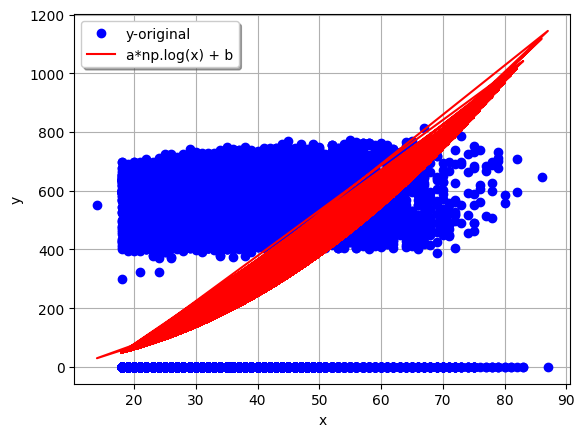

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.log(x) + b", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

-0.23704220385016805

In [ ]:
#Calculamos el coeficiente de correlación del modelo
corr= np.sqrt(abs(R2))
corr

0.4868698017439242

### Modelo 3 (Función inversa)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df[['puntos']]
Var_Dep= df['score_buro']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return 1/a*x

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['puntos'], df['score_buro'])

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([0.097677, 1.      , 1.      ])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['puntos'], df['score_buro'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =1/a*x

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

,puntos
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
22730,102.378251
22731,92.140426
22732,112.616076
22733,143.329551


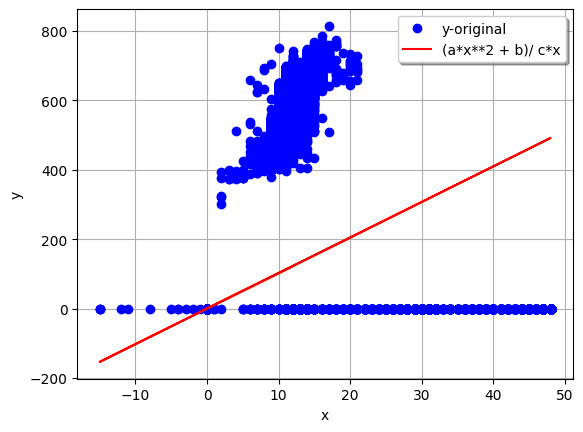

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="(a*x**2 + b)/ c*x", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

-0.6133979740866786

In [ ]:
#Calculamos el coeficiente de correlación del modelo
corr= np.sqrt(abs(R2))
corr

0.7831972766083132

### Modelo 4 (Función cuadrática inversa)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal}
Vars_Indep= df[['enganche']]
Var_Dep= df['score_buro']
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return 1/a*x**2

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['enganche'], df['score_buro'])

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([5.57710314e+03, 1.00000000e+00, 1.00000000e+00])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['enganche'], df['score_buro'])
a, b ,c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = 1/a*x**2

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

,enganche
0,109.088892
1,197.683273
2,43.051024
3,43.051024
4,207.208827
...,...
22730,15.816276
22731,262.086062
22732,237.955793
22733,144.453844


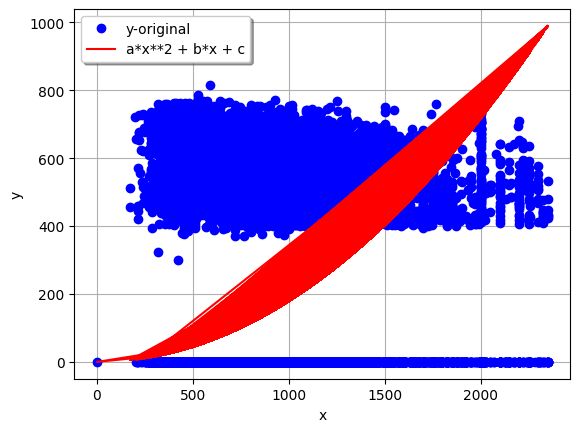

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b*x + c", c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

-0.4095820223690929

In [ ]:
#Calculamos el coeficiente de correlación del modelo
corr= np.sqrt(abs(R2))
corr

0.6399859548217389

### Modelo 5 (Función lineal con producto de coeficientes)

In [ ]:
Vars_Indep = df[["pagos_realizados"]]
Var_Dep = df[["score_buro"]]
x = Vars_Indep
y = Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return a*x + b*x + c*x

In [ ]:
parametros, covs = curve_fit(func1, df["pagos_realizados"], df["score_buro"])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([145.66929691, -66.46273745, -66.46273745])

In [ ]:
parametros, _ = curve_fit(func1, df["pagos_realizados"], df["score_buro"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =a*x + b*x + c*x

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

,pagos_realizados
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
22730,0.0
22731,0.0
22732,0.0
22733,0.0


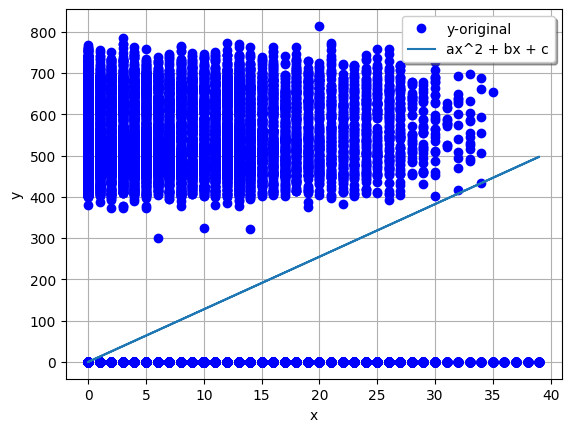

In [ ]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "ax^2 + bx + c")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

-0.6718812483371981

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
corr= np.sqrt(abs(R2))
corr

0.8196836269788473

## Variable porc_eng

### Modelo 1 (Función de valor absoluto)

In [ ]:
Vars_Indep = df[["enganche"]]
Var_Dep = df[["porc_eng"]]
x = Vars_Indep
y = Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

In [ ]:
parametros, covs = curve_fit(func1, df["enganche"], df["porc_eng"])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-99.99550365, 100.00454938,  14.69006008])

In [ ]:
parametros, _ = curve_fit(func1, df["enganche"], df["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

,enganche
0,21.745733
1,24.188081
2,19.122470
3,19.122470
4,24.414225
...,...
22730,17.376643
22731,25.626353
22732,25.110746
22733,22.809250


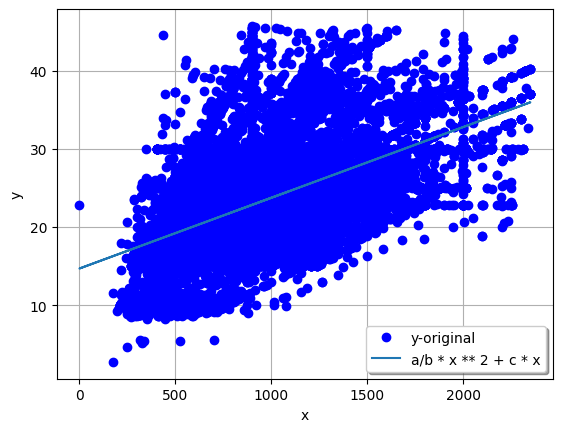

In [ ]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a/b * x ** 2 + c * x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

0.30360019912799263

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
corr= np.sqrt(abs(R2))
corr

0.5509992732554124

### Modelo 2 (Función logaritmica)

In [ ]:
Vars_Indep = df[["costo_total"]]
Var_Dep = df[["porc_eng"]]
x = Vars_Indep
y = Var_Dep

In [ ]:
def func1 (x, a, b, c):
  return a/b*x**2 + c*x


In [ ]:
parametros, covs = curve_fit(func1, df["costo_total"], df["porc_eng"])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-4.42715079e-06,  7.46152589e+00,  7.76309420e-03])

In [ ]:
parametros, _ = curve_fit(func1, df["costo_total"], df["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a/b*x**2 + c*x

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

,costo_total
0,13.717516
1,17.630737
2,14.258553
3,14.258553
4,25.297994
...,...
22730,24.731344
22731,24.324433
22732,25.385228
22733,24.853687


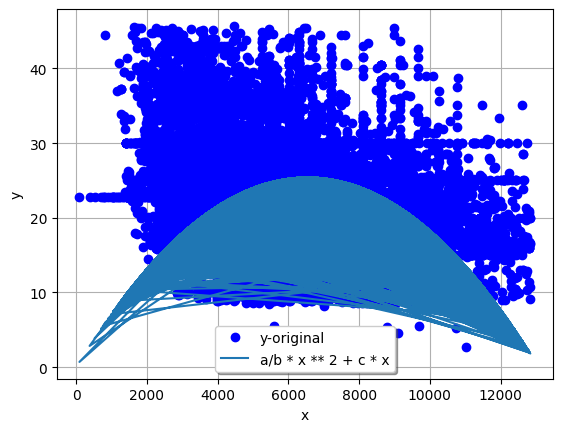

In [ ]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a/b * x ** 2 + c * x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

-0.485758081502637

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
corr= np.sqrt(abs(R2))
corr

0.696963472143725

### Modelo 3 (Función cuadratica)

In [ ]:
Vars_Indep = df[["riesgo"]]
Var_Dep = df[["porc_eng"]]
x = Vars_Indep
y = Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
parametros, covs = curve_fit(func1, df["riesgo"], df["porc_eng"])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-4.46727774e-04,  1.91803026e-01,  2.19508432e+01])

In [ ]:
parametros, _ = curve_fit(func1, df["riesgo"], df["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

,riesgo
0,21.950843
1,21.950843
2,21.950843
3,21.950843
4,21.950843
...,...
22730,26.870861
22731,25.433832
22732,26.745118
22733,18.488586


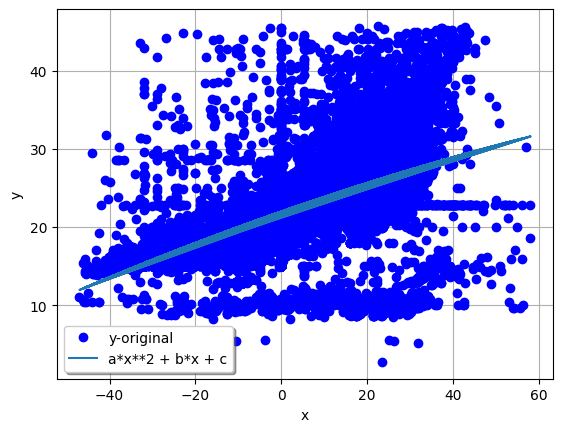

In [ ]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a*x**2 + b*x + c")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

0.29197426553758643

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
corr= np.sqrt(abs(R2))
corr

0.5403464310399269

### Modelo 4 (Función cuadratica)

In [ ]:
Vars_Indep = df[["puntos"]]
Var_Dep = df[["porc_eng"]]
x = Vars_Indep
y = Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
parametros, covs = curve_fit(func1, df["puntos"], df["porc_eng"])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-3.08769969e-04, -2.16837598e-01,  2.59798609e+01])

In [ ]:
parametros, _ = curve_fit(func1, df["riesgo"], df["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

,puntos
0,21.950843
1,21.950843
2,21.950843
3,21.950843
4,21.950843
...,...
22730,23.824201
22731,23.640885
22732,24.006622
22733,24.548527


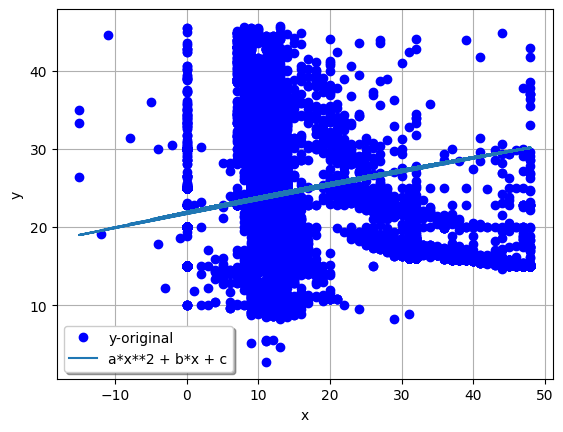

In [ ]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a*x**2 + b*x + c")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

-0.4598291622689352

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
corr= np.sqrt(abs(R2))
corr

0.6781070433706873

### Modelo 5 (Función polinomial inversa)

In [ ]:
Vars_Indep = df[["monto_financiado"]]
Var_Dep = df[["porc_eng"]]
x = Vars_Indep
y = Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return a/b*x**2 + c*x

In [ ]:
parametros, covs = curve_fit(func1, df["monto_financiado"], df["porc_eng"])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

In [ ]:
parametros, _ = curve_fit(func1, df["monto_financiado"], df["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =a/b*x**2 + c*x

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

In [ ]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a*x**2 + b*x + c")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
corr= np.sqrt(abs(R2))
corr

## Variable limite_credito

### Modelo 1 (Función de valor absoluto)

In [ ]:
Vars_Indep = df[["riesgo"]]
Var_Dep = df[["limite_credito"]]
x = Vars_Indep
y = Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

In [ ]:
parametros, covs = curve_fit(func1, df["riesgo"], df["limite_credito"])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

In [ ]:
parametros, _ = curve_fit(func1, df["riesgo"], df["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

In [ ]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a/b * x ** 2 + c * x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
corr= np.sqrt(abs(R2))
corr

### Modelo 2 (Función logaritmica)

In [ ]:
Vars_Indep = df[["porc_eng"]]
Var_Dep = df[["limite_credito"]]
x = Vars_Indep
y = Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return a*np.log(x) + b

In [ ]:
parametros, covs = curve_fit(func1, df["porc_eng"], df["limite_credito"])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

In [ ]:
parametros, _ = curve_fit(func1, df["porc_eng"], df["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.log(x) + b

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

In [ ]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "a*np.log(x) + b")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
corr= np.sqrt(abs(R2))
corr

### Modelo 3 (Función cociente entre polinomios)

In [ ]:
Vars_Indep = df[["puntos"]]
Var_Dep = df[["limite_credito"]]
x = Vars_Indep
y = Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

In [ ]:
parametros, covs = curve_fit(func1, df["puntos"], df["limite_credito"])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

In [ ]:
parametros, _ = curve_fit(func1, df["puntos"], df["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**2 + b)/ c*x

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

In [ ]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a*x**2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
corr= np.sqrt(abs(R2))
corr

### Modelo 4 (Función cociente entre polinomios)

In [ ]:
Vars_Indep = df[["enganche"]]
Var_Dep = df[["limite_credito"]]
x = Vars_Indep
y = Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

In [ ]:
parametros, covs = curve_fit(func1, df["enganche"], df["limite_credito"])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

In [ ]:
parametros, _ = curve_fit(func1, df["enganche"], df["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =(a*x**2 + b)/ c*x

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

In [ ]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a*x**2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
corr= np.sqrt(abs(R2))
corr

### Modelo 5 (Función cociente entre polinomios)

In [ ]:
Vars_Indep = df[["semana_actual"]]
Var_Dep = df[["limite_credito"]]
x = Vars_Indep
y = Var_Dep

In [ ]:
def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

In [ ]:
parametros, covs = curve_fit(func1, df["semana_actual"], df["limite_credito"])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

In [ ]:
parametros, _ = curve_fit(func1, df["semana_actual"], df["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =(a*x**2 + b)/ c*x

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones

yfit1

In [ ]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a*x**2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
R2

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
corr= np.sqrt(abs(R2))
corr